# Importing Libraries

In [61]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Dataset

In [62]:
airlines_data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [63]:
airlines_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# Data Understanding

In [64]:
airlines_data.shape

(3999, 12)

In [65]:
airlines_data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [66]:
airlines_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


# Data Visualization

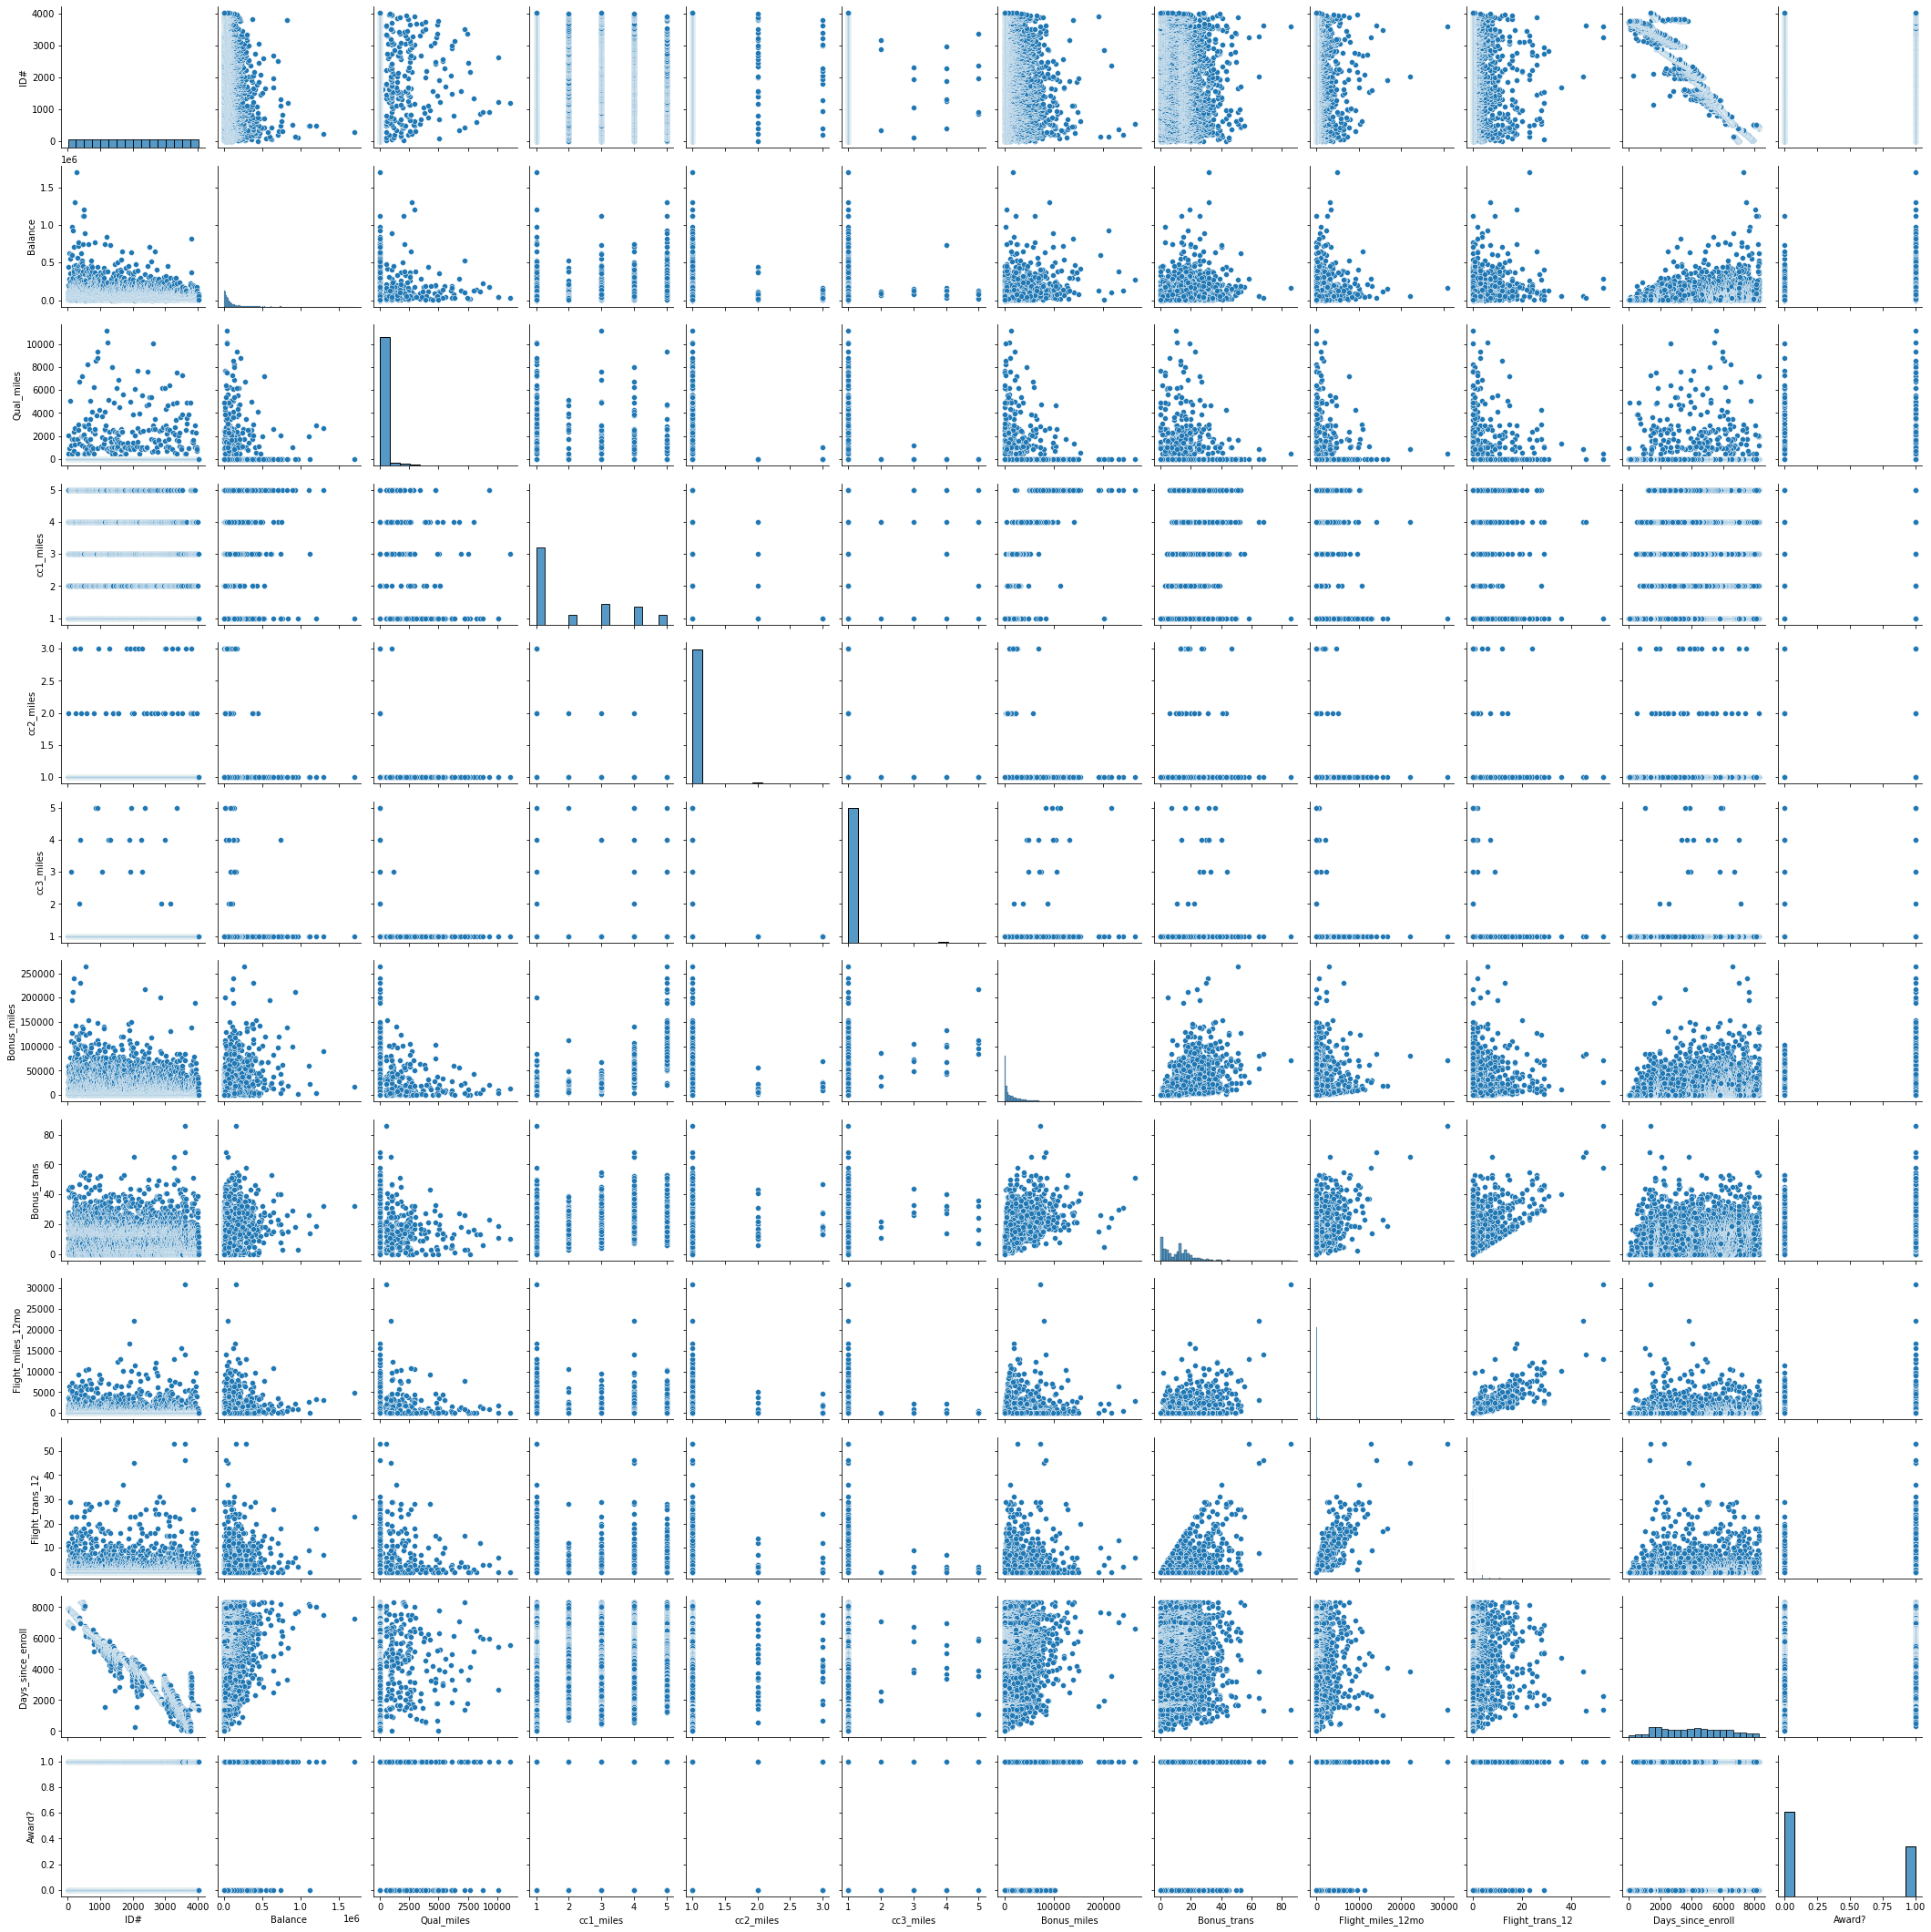

In [8]:
sns.pairplot(airlines_data)

# Data Preprocessing

In [9]:
airlines_data=airlines_data.rename(columns={'ID#':'ID', 'Award?':'Award'})

In [10]:
del airlines_data['ID']

# For Hierarchial Clustering

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
norm_airlines_data=mm.fit_transform(airlines_data)

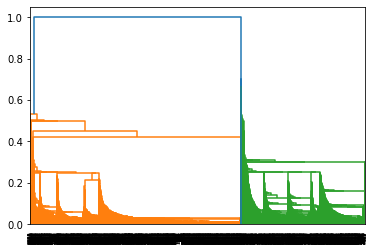

In [11]:
dendogram=sch.dendrogram(sch.linkage(norm_airlines_data,method='single'))

In [67]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [68]:
y_hc=hc.fit_predict(norm_airlines_data)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [69]:
    clusters=pd.DataFrame(y_hc,columns=['Clusters'])
    clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [70]:
airlines_data['Clusters']=clusters

In [71]:
airlines_data[airlines_data['Clusters']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [72]:
airlines_data[airlines_data['Clusters']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [73]:
airlines_data[airlines_data['Clusters']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,2


In [74]:
airlines_data[airlines_data['Clusters']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
2840,2862,8557,0,1,1,1,200622,5,622,3,1955,1,3


# For K-Means Clustering

####  Importing Necessary Libraries for K-Means

In [75]:
from sklearn.cluster import KMeans

### Data Preprocessing

In [76]:
airlines_data_new=airlines_data.drop(columns=['Clusters'],axis=1)

In [77]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
scaled_airlines_data_new=sts.fit_transform(airlines_data_new)

1 [47987.99999999993]
2 [47987.99999999993, 39018.84742954439]
3 [47987.99999999993, 39018.84742954439, 34529.1686661134]
4 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926]
5 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926, 26894.75305989322]
6 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926, 26894.75305989322, 23490.749028769827]
7 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926, 26894.75305989322, 23490.749028769827, 21885.368244869365]
8 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926, 26894.75305989322, 23490.749028769827, 21885.368244869365, 19330.695176303685]
9 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926, 26894.75305989322, 23490.749028769827, 21885.368244869365, 19330.695176303685, 18015.30065898044]
10 [47987.99999999993, 39018.84742954439, 34529.1686661134, 30616.6236360926, 26894.75305989322, 23490.749028769827, 21885

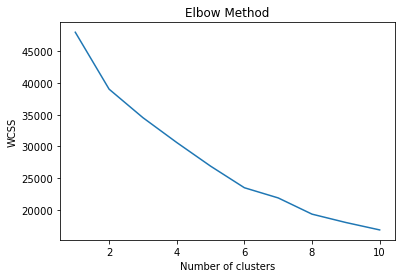

In [78]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_airlines_data_new)
    wcss.append(kmeans.inertia_)
    print(i,wcss)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [79]:
clusters_new = KMeans(4, random_state=13)
clusters_new.fit(scaled_airlines_data_new)

KMeans(n_clusters=4, random_state=13)

In [80]:
clusters_new.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [81]:
airlines_data_new['clusters_new'] = clusters_new.labels_

In [82]:
clusters_new.cluster_centers_

array([[-0.21937913,  1.19293893,  0.85463972,  0.1048172 ,  0.16062214,
        -0.06276658,  0.63532192,  1.6738428 ,  3.59883523,  3.90180833,
         0.26628629,  0.93459683],
       [ 0.96477511, -0.33302824, -0.05337351, -0.48091901,  0.01574764,
        -0.06276658, -0.44560585, -0.38567835, -0.18294754, -0.20243324,
        -0.95144756, -0.32058346],
       [-0.79159289, -0.16435061, -0.04825387, -0.50585756,  0.02680935,
        -0.05882618, -0.46590113, -0.37645782, -0.16543415, -0.17638578,
         0.77091404, -0.23965222],
       [-0.42834932,  0.54252058,  0.01104681,  1.38834343, -0.08465391,
         0.18385431,  1.19798091,  0.82494974, -0.06750129, -0.07073525,
         0.42727309,  0.66210394]])

In [83]:
airlines_data_new[airlines_data_new['clusters_new']==0]
# For k=1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,0
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,0
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,0
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,0
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,0
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,0


In [84]:
airlines_data_new[airlines_data_new['clusters_new']==1]
# For k= 2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,1
1424,1438,22093,0,3,1,1,14857,11,200,1,2587,0,1
1950,1967,15676,0,1,1,1,0,0,0,0,3178,0,1
1951,1968,55064,0,2,1,1,8041,13,0,0,3329,1,1
1952,1969,40675,0,1,1,1,1413,9,0,0,2895,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [85]:
airlines_data_new[airlines_data_new['clusters_new']==2]
# For k=3

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,2185,245045,0,1,1,1,25039,16,500,1,4173,0,2
2176,2193,194875,0,1,1,1,7550,6,1050,3,3831,1,2
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,2
2194,2211,81251,0,1,1,1,19500,6,0,0,3958,1,2


In [86]:
airlines_data_new[airlines_data_new['clusters_new']==3]
# For k= 4

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_new
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3867,3890,88404,0,4,1,1,37304,29,500,1,1628,0,3
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3


# For DBSCAN

In [87]:
from sklearn.cluster import DBSCAN

In [88]:
airlines_data_new=airlines_data_new.drop(['clusters_new'],axis=1)

In [89]:
dbs=DBSCAN(min_samples=2,eps=1)
class_pr=dbs.fit_predict(airlines_data_new)

In [90]:
airlines_data_new["class_pr"]=class_pr

In [91]:
set(class_pr)

{-1}

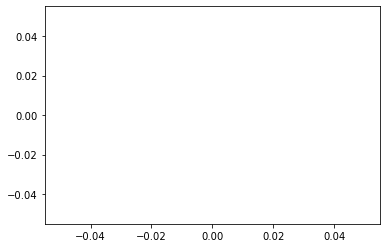

In [96]:
plt.scatter(airlines_data_new[airlines_data_new["class_pr"]==0],airlines_data_new[airlines_data_new["class_pr"]==1],color="red")
plt.scatter(airlines_data_new[airlines_data_new["class_pr"]==0],airlines_data_new[airlines_data_new["class_pr"]==1],color="black")

In [93]:
# DBSCAN is not able to separate datapoints properly